<a href="https://colab.research.google.com/github/g1uLiax/uek259-ai/blob/main/04_clustering_with_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering
<a target="_blank" href="https://colab.research.google.com/github/LuWidme/uk259/edit/main/demos/04_Clustering_with_KMeans.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

The aim of clustering is to automatically find groups of similar datapoints in unlabeled data. In this exercise, your aim will be to implement the k-Means algorithm and apply it to a set of random data.



## Task Implement the KMeans algorithm

Input:

* A 2D array of features

* A number of groups (nGroups)

Output:

* A 1D array of estimated group membership for each point
* Coordinates of the cluster centers

### Step by Step guide to developing this algorithm:





1.  **Initialize** :
Start by initializing an array of 2D points called clusterCenters. It should have the length nGroups. You can initialize them however you want. The easiest starting point for now is to hardcode them (e.g., [0, 0]). Initialize a list of the same length as the featureArray called clusterAssignments to track cluster membership of each point. You can use the np.empty() function for this.



2. **Assign Points to Clusters**: Loop through each point and calculate the distance to every cluster center. You can define your own function using Pythagorean math or use the predefined metric of scikit-learn. Assign each point to its closest cluster by updating clusterAssignments at the respective index. Print the closest cluster center for each point as an intermediate result.



3. **Update Cluster Centers**: Recalculate all clusterCenters by averaging the coordinates of all the points in a given cluster. For example, if the 2 points in cluster one have the coordinates [1,1] and [2,2], the cluster center should have the updated coordinates [1.5, 1.5]. Print the updated cluster center coordinates as an intermediate result.


> Tipp: You can use `numpy.average` to easily average the coordinates by using the `axis` optional paramter




4. Repeat steps 2 and 3 for a fixed number of iterations (e.g. 25 times).

5. Return the clusterAssignments and clusterCenters.



**This is a very basic implementation of the kMeans algorithm.**


**Now use the clusterAssignments and clusterCenters variables to visualize your results.**

---


## Improvements
Next, try to improve it by adding some or all of the following:

* Try to think of a strategy to initialize the cluster centers more intelligently, instead of hardcoding the startpoints.
* Make the number of cluster centers dynamic (equal to nGroups)
* Visualize intermediate results (you could produce a GIF similar to the one in the presentation.)
* Choose a better strategy to stop the loop in point 4 (e.g. change the foor-loop for a while loop that ends when the cluster centers don't change (much) anymore)

* Optimal K: Try to implement a strategy to automatically choose an optimal number of clusters. Research-Tip: "Elbow Method"

[[ -6.92324165 -10.66953197]
 [ -8.63062033  -7.13940564]
 [ -9.63048069  -2.72044935]
 [ -2.30647659   5.30797676]
 [ -7.57005366  -3.01446491]
 [ -1.00051011   2.77905153]
 [ -4.81826839  -2.77214822]
 [ -5.33964799  -1.27625764]
 [ -7.9430884   -3.89993901]
 [ -5.54924525  -3.41298968]]
[2 2 1 0 3 0 3 3 1 3]


[]

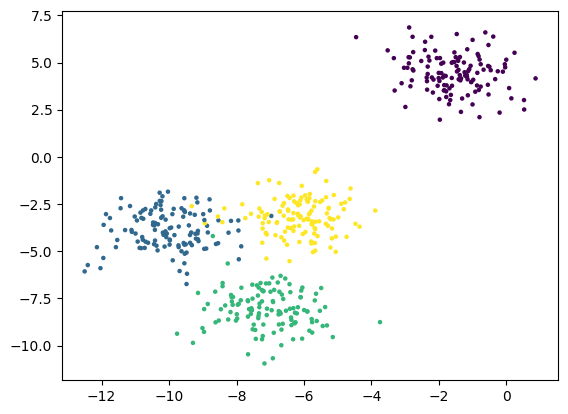

In [231]:
import seaborn as sns #for plotting
from sklearn.datasets import make_blobs #data generator

# automatically generate a random dataset with underlying clusters. You can play around with the parameters of this generator function to test your algorithm.
# true labels are the actual group a point belongs to. you can use them later to check the quality of your algorithm

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
import numpy as np
import math
# automatically generate random dataset

features, true_labels = make_blobs(
    n_samples=500,
    centers=4,
    cluster_std=1,
    random_state=1
)

print(features[:10])
print( true_labels[:10])
fig, ax = plt.subplots()
ax.scatter(x=features[:,0], y=features[:,1], s=5
           ,c=true_labels)
plt.plot()
# visualize the data with the true labels to get an overview of the data

In [232]:
# implement the kmeans algorithm
# it should take a 2D array of features and number of Groups as Input
# and return a 1D array of estimated group membership of each point, and the coordinates of the cluster centers.
# assign member -> reiterate -
cluster_centers = {}

def k_meansno(featureArray, nGroups):
  ppoints = ([[]])
  for idx in range(nGroups):
    center = np.random.rand(1, 2) * 2
    points = []
    cluster = {
        'center': center,
        'points': points
    }
    cluster_centers[idx] = cluster

  i = 0
  while (i < 20):
    for idx in range(len(featureArray)): #it for each point
      point = featureArray[idx]
      print("new it")
      print(point)
      distances = ([])
      for i in range(nGroups): # it dist to point
        center = cluster_centers[i]['center']
        distances.append(math.dist(point, center[0]))
      print(distances)
      ppoints.append(point)
      cluster_centers[np.argmin(distances)]['points'].append(point)
      print(cluster_centers)
      i++
    return 1
    # array for distances, index at lowest distance is index in cluster_centers where point should be added

SyntaxError: invalid syntax (ipython-input-232-2741014860.py, line 32)

In [269]:
def k_means(featureArray, nGroups):
  estimated_labels = np.random.random([len(featureArray)])
  cluster_old = np.random.rand(nGroups, 2) * 2
  cluster_centers = np.random.uniform(np.min(featureArray), np.max(featureArray), size=(nGroups, featureArray.shape[1]))
  print(cluster_centers)

  z = 0
  while z < 1000:
    for idx in range(len(featureArray)): #it for each point
      distances = ([])
      for i in range(nGroups): # it dist to point
        distances.append(math.dist(featureArray[idx], cluster_centers[i]))
      #print(distances)
      estimated_labels[idx] = np.argmin(distances)
    #print(estimated_labels)
    cluster_old = cluster_centers
    for i in range(nGroups):
      indices = np.where(estimated_labels == i)[0]
      if len(indices) > 0:
        cl_points = featureArray[indices]
        cluster_centers[i] = np.mean(cl_points, axis=0)
      #print(avg)
    z = z + 1
  return estimated_labels, cluster_centers


[[ -5.58360732 -11.46321912]
 [  2.88589928   4.9976799 ]
 [-10.81779296   1.70974242]
 [ -0.25537396  -5.7786972 ]]


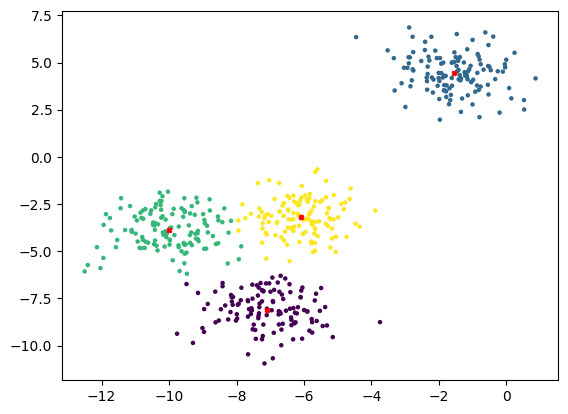

In [271]:
# apply k means to your dataset to cluster the data

estimated_labels, cluster_centers = k_means(features, 4)

plt.scatter(x=features[:, 0], y=features[:, 1], s=5, c=estimated_labels)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
            c='red', marker='X', s=10, label='Cluster Centers')
plt.show()